# DIABETES & COVID-19 RELATED DEATHS AMONG YOUNG AND MIDDLE-AGED ADULTS IN 2020 #

First, let's pull in our [dataset](https://data.cdc.gov/NCHS/AH-Provisional-Diabetes-Death-Counts-for-2020/qdcb-uzft/about_data) from the [CDC](https://www.cdc.gov/nchs/nvss/index.htm) repository!

In [11]:
import csv 
import requests 
import pandas as pd
import matplotlib.pyplot as plt 

## Import data into vscode 
csv_file = requests.get("https://data.cdc.gov/resource/qdcb-uzft.csv")

diabetes_data = list(csv.DictReader(csv_file.text.splitlines()))

## Pre-process data
for row in diabetes_data:
        row["death_month"] = int(row["death_month"])
        row["covid19"] = int(row["covid19"])
        row["diabetes_uc"] = int(row["diabetes_uc"])
        row["diabetes_mc"] = int(row["diabetes_mc"])
        row["c19plusdiabetes"] = int(row["c19plusdiabetes"])
        row["c19plushypertensived"] = int(row["c19plushypertensived"])
        row["c19plusmcvd"] = int(row["c19plusmcvd"])
        row["c19plushypertensive_mcvd"] = int(row["c19plushypertensive_mcvd"])
        row["c19pluschroniclowerresp"] = int(row["c19pluschroniclowerresp"])
        row["c19pluskidneydisease"] = int(row["c19pluskidneydisease"])
        row["c19pluschronicliver"] = int(row["c19pluschronicliver"])
        row["c19plusobesity"] = int(row["c19plusobesity"])

Filtering the data to ensure we are only working with sex, agegroup, death month, and diseases.

In [12]:
def conditions(data):
    # Extract headers
    all_headers = data[0].keys()
    selected_headers = list(all_headers)[2:16]  
    
    # Filter data by selected headers
    filtered_data = [
        {header: row[header] for header in selected_headers}
        for row in data
    ]
    return filtered_data

filtered_diabetes_data = conditions(diabetes_data) 

We want to analyze data on young and middle-aged adults. Let's set our markers.

In [13]:
# Set targeted age groups
young_adults_deaths = []
for row in filtered_diabetes_data:
    if row["agegroup"] in ["18-29 years", "30-39 years"]:
        young_adults_deaths.append(row)

mid_aged_adults_deaths = []
for row in filtered_diabetes_data:
    if row["agegroup"] in ["40-49 years", "50-59 years", "50-64 years"]:
        mid_aged_adults_deaths.append(row)
## Convert results to pandas DataFrame
df = pd.DataFrame(young_adults_deaths)
df.to_csv("young_adult_deaths.csv")
df2 = pd.DataFrame(mid_aged_adults_deaths)
df2.to_csv("Middle_aged_adult_deaths.csv")

## Analysis & Visualization ## 
### What questions can we answer with our data? ###

Which sex had the most diabetes-related covid deaths in 2020?

sex
Female (F)    187
Male (M)      324
Name: c19plusdiabetes, dtype: int64


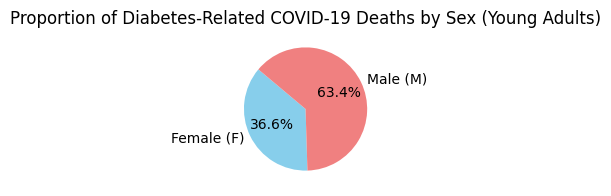

In [14]:
## Finding the sum of c19 plus diabetes deaths aggregating by sex
sex_distribution = df.groupby("sex")["c19plusdiabetes"].sum()
print(sex_distribution)

plt.figure(figsize=(2, 2))
sex_distribution.plot(kind="pie", autopct="%1.1f%%", startangle=140, colors=["skyblue", "lightcoral"])

plt.title("Proportion of Diabetes-Related COVID-19 Deaths by Sex (Young Adults)")
plt.ylabel("")
plt.show()

sex
Female (F)    4261
Male (M)      7558
Name: c19plusdiabetes, dtype: int64


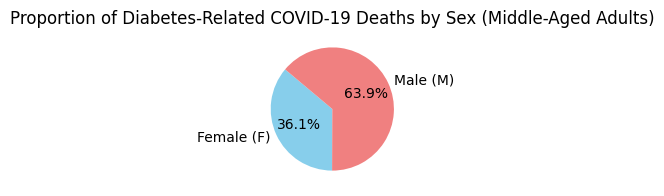

In [15]:
sex_distribution2 = df2.groupby("sex")["c19plusdiabetes"].sum()
print(sex_distribution2)

plt.figure(figsize=(2, 2))
sex_distribution2.plot(kind="pie", autopct="%1.1f%%", startangle=140, colors=["skyblue", "lightcoral"])

plt.title("Proportion of Diabetes-Related COVID-19 Deaths by Sex (Middle-Aged Adults)")
plt.ylabel("")
plt.show()

What was the most common comorbidity combination involving COVID-19 in each age group?

c19plushypertensive_mcvd    1167
c19plusmcvd                 1167
c19plusobesity               776
c19plusdiabetes              511
c19plushypertensived         343
c19pluskidneydisease         315
c19pluschroniclowerresp      167
c19pluschronicliver           87
dtype: int64


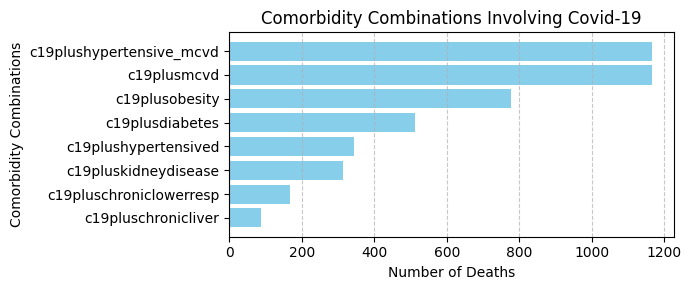

In [16]:
## Integer-location based indexing to specify appropriate columns 
dcombo = df.iloc[:, 6:]
## Finding the sum of deaths for each selected column
deaths_by_combo = dcombo.sum(numeric_only=True).sort_values(ascending=False)
print(deaths_by_combo)

plt.figure(figsize=(7, 3))
plt.barh(deaths_by_combo.index, deaths_by_combo.values, color="skyblue")

plt.title("Comorbidity Combinations Involving Covid-19")
plt.xlabel("Number of Deaths")
plt.ylabel("Comorbidity Combinations")
plt.gca().invert_yaxis()  
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


c19plushypertensive_mcvd    23572
c19plusmcvd                 23572
c19plusdiabetes             11819
c19plushypertensived        10790
c19pluskidneydisease         5858
c19plusobesity               5332
c19pluschroniclowerresp      3266
c19pluschronicliver          1124
dtype: int64


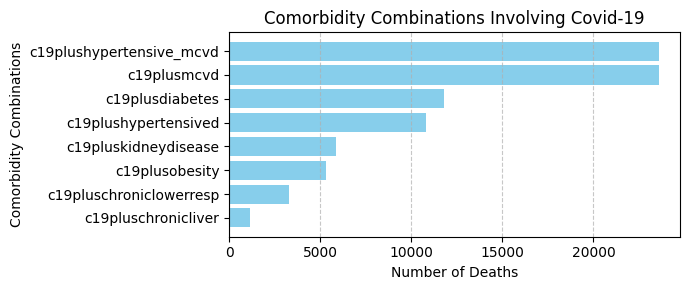

In [17]:
dcombo = df2.iloc[:, 6:]
deaths_by_combo = dcombo.sum(numeric_only=True).sort_values(ascending=False)
print(deaths_by_combo)

plt.figure(figsize=(7, 3))
plt.barh(deaths_by_combo.index, deaths_by_combo.values, color="skyblue")

plt.title("Comorbidity Combinations Involving Covid-19")
plt.xlabel("Number of Deaths")
plt.ylabel("Comorbidity Combinations")
plt.gca().invert_yaxis()  
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

Did diabetes-related deaths peak during any specific months?

             c19plusdiabetes  diabetes_uc  diabetes_mc
death_month                                           
4                        127          214          509
7                        123          214          506
5                         63          210          437
3                         32          233          430
6                         61          190          412
8                         70          176          380
1                          0          196          366
2                          1          186          359
9                         34           99          222


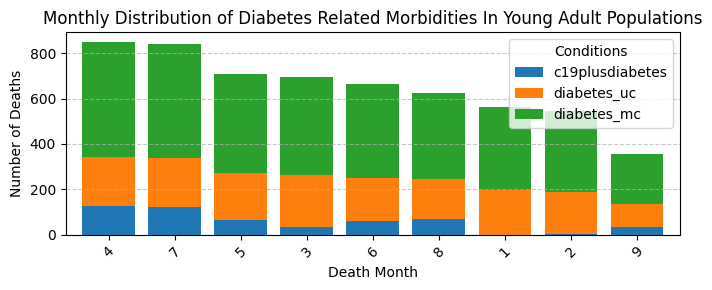

In [18]:
## Calculating the sum of deaths in each diabetes-related column, aggregating by months 
month_distribution = df.groupby("death_month")[["c19plusdiabetes", "diabetes_uc", "diabetes_mc"]].sum()
month_distribution["total_deaths"] = month_distribution.sum(axis=1)  
month_distribution = month_distribution.sort_values(by="total_deaths", ascending=False)  
month_distribution = month_distribution.drop(columns=["total_deaths"])
print(month_distribution)

month_distribution.plot(kind="bar", stacked=True, figsize=(7, 3), width=0.8)

plt.title("Monthly Distribution of Diabetes Related Morbidities In Young Adult Populations")
plt.xlabel("Death Month")
plt.ylabel("Number of Deaths")
plt.legend(title="Conditions")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

             c19plusdiabetes  diabetes_uc  diabetes_mc
death_month                                           
4                       3020         3558        12122
7                       2555         3402        11328
8                       1961         2983        10052
5                       1668         3179         9976
6                       1200         2964         9265
3                        480         3275         9299
1                          0         3194         8511
2                          2         3129         8130
9                        933         2516         7608


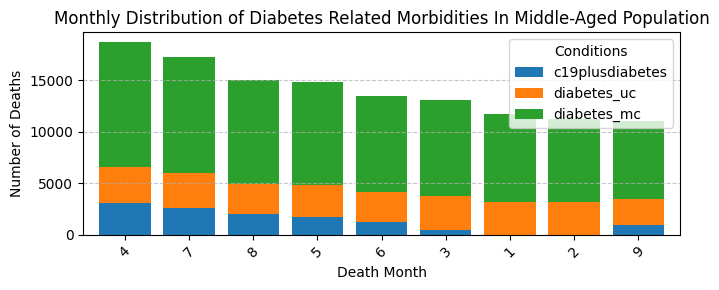

In [19]:
month_distribution = df2.groupby("death_month")[["c19plusdiabetes", "diabetes_uc", "diabetes_mc"]].sum()
month_distribution["total_deaths"] = month_distribution.sum(axis=1)  
month_distribution = month_distribution.sort_values(by="total_deaths", ascending=False)  
month_distribution = month_distribution.drop(columns=["total_deaths"])
print(month_distribution)

month_distribution.plot(kind="bar", stacked=True, figsize=(7, 3), width=0.8)

plt.title("Monthly Distribution of Diabetes Related Morbidities In Middle-Aged Population")
plt.xlabel("Death Month")
plt.ylabel("Number of Deaths")
plt.legend(title="Conditions")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

Lastly, how do diabetes-related deaths differ between men and women?

            c19plusdiabetes  diabetes_uc  diabetes_mc
sex                                                  
Female (F)              187          659         1402
Male (M)                324         1059         2219


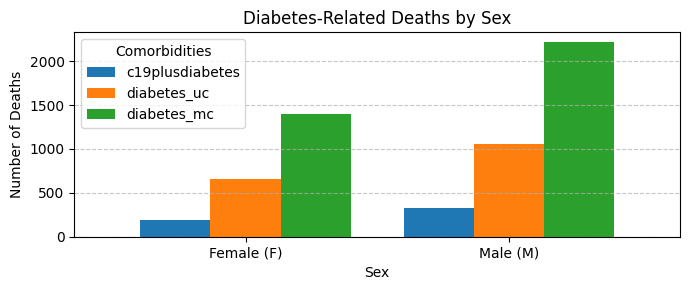

In [20]:
## Aggregating by sex
diabetes_sex_distribution = df.groupby("sex")[["c19plusdiabetes", "diabetes_uc", "diabetes_mc"]].sum()
print(diabetes_sex_distribution)

diabetes_sex_distribution.plot(kind="bar", figsize=(7, 3), width=0.8)

plt.title("Diabetes-Related Deaths by Sex")
plt.xlabel("Sex")
plt.ylabel("Number of Deaths")
plt.xticks(rotation=0)
plt.legend(title="Comorbidities")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


            c19plusdiabetes  diabetes_uc  diabetes_mc
sex                                                  
Female (F)             4261        10275        31785
Male (M)               7558        17925        54506


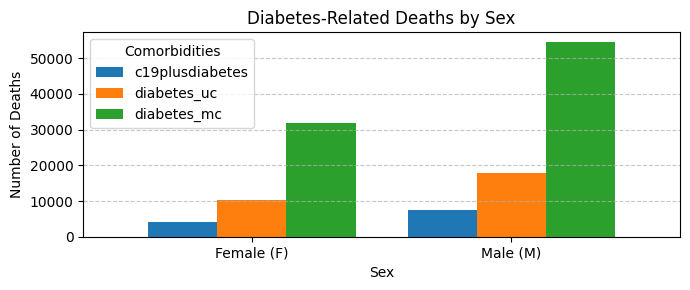

In [21]:
diabetes_sex_distribution = df2.groupby("sex")[["c19plusdiabetes", "diabetes_uc", "diabetes_mc"]].sum()
print(diabetes_sex_distribution)

diabetes_sex_distribution.plot(kind="bar", figsize=(7, 3), width=0.8)

plt.title("Diabetes-Related Deaths by Sex")
plt.xlabel("Sex")
plt.ylabel("Number of Deaths")
plt.xticks(rotation=0)
plt.legend(title="Comorbidities")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()